In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240418_NBFF_NoisyGRU_Final4/max_epochs=500 latent_size=64 seed=0/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)


path_GRU_Sweep = pathTT + "20240419_Fig1_NBFF_GRU_Sweep/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_Vanilla_Sweep = pathTT + "20240419_Fig1_NBFF_Vanilla_Sweep2/"
subfolders_Vanilla = [f.path for f in os.scandir(path_Vanilla_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240424_Fig1_NBFF_NODE/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]

path_LFADS_Sweep = pathTT + "20240422_Fig1_NBFF_LFADS_Sweep/"
subfolders_LFADS = [f.path for f in os.scandir(path_LFADS_Sweep) if f.is_dir()]

/home/csverst/Github/CtDBenchmark/


In [3]:
comparison = Comparison(comparison_tag="Figure1NBFF")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "GRU")

for subfolder in subfolders_Vanilla:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "Vanilla", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "Vanilla")

for subfolder in subfolders_NODE:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "NODE")

for subfolder in subfolders_LFADS:     
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
    comparison.load_analysis(analysis_temp, group = "LFADS")

comparison.regroup()

Working on 1 of 21: GRU
Group: GRU
Rate R2: 0.9218003426745056
State R2: 0.891726002854312
Working on 2 of 21: GRU
Group: GRU
Rate R2: 0.934975058801746
State R2: 0.8867912967384707
Working on 3 of 21: GRU
Group: GRU
Rate R2: 0.923297040589586
State R2: 0.8823670137848005
Working on 4 of 21: GRU
Group: GRU
Rate R2: 0.9249596531262995
State R2: 0.8947628065326635
Working on 5 of 21: GRU
Group: GRU
Rate R2: 0.934281340681907
State R2: 0.9065198304364637
Working on 6 of 21: LFADS
Group: LFADS
Rate R2: 0.8803160853399248
State R2: 0.9082598889819301
Working on 7 of 21: LFADS
Group: LFADS
Rate R2: 0.8978364635056489
State R2: 0.915520106606203
Working on 8 of 21: LFADS
Group: LFADS
Rate R2: 0.8800844374670876
State R2: 0.9061454913567016
Working on 9 of 21: LFADS
Group: LFADS
Rate R2: 0.8921978370805137
State R2: 0.9174539945122534
Working on 10 of 21: LFADS
Group: LFADS
Rate R2: 0.9033814195503108
State R2: 0.9210814191743522
Working on 11 of 21: NODE
Group: NODE
Rate R2: 0.897609141748129

array([[0.92180034, 0.891726  ],
       [0.93497506, 0.8867913 ],
       [0.92329704, 0.88236701],
       [0.92495965, 0.89476281],
       [0.93428134, 0.90651983],
       [0.88031609, 0.90825989],
       [0.89783646, 0.91552011],
       [0.88008444, 0.90614549],
       [0.89219784, 0.91745399],
       [0.90338142, 0.92108142],
       [0.89760914, 0.95960987],
       [0.89138337, 0.95459341],
       [0.88761823, 0.95016339],
       [0.89237879, 0.93912596],
       [0.88242128, 0.91665304],
       [0.        , 0.        ],
       [0.89668478, 0.91362368],
       [0.89225641, 0.91529596],
       [0.88830965, 0.9040559 ],
       [0.90099581, 0.9131118 ],
       [0.8835061 , 0.90601367]])

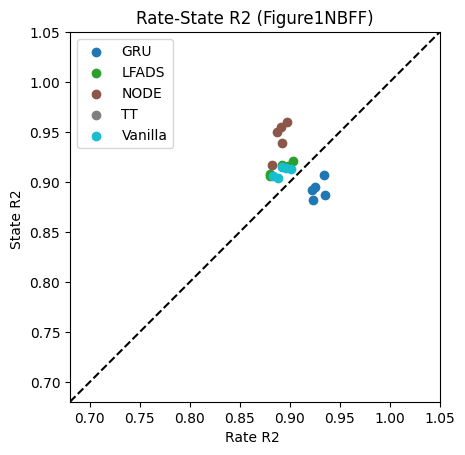

In [5]:
comparison.compare_rate_state_r2(save_pdf=True)

(100000, 50)
(100000, 50)
[0.97557774 0.97491875 0.95679807 0.95839226 0.97144806 0.93274989
 0.97755192 0.95119621 0.9687754  0.94577432 0.8502518  0.95415528
 0.93954745 0.97348493 0.97313383 0.97123273 0.93780167 0.93431812
 0.97140493 0.90786079 0.94284065 0.98058698 0.96805989 0.91774177
 0.94960109 0.86633482 0.94182681 0.81232775 0.94616487 0.84405917
 0.93819443 0.94409283 0.94181643 0.94865676 0.71771999 0.9758101
 0.96890377 0.984704   0.93740476 0.80543207 0.95156828 0.95198613
 0.94569961 0.96975124 0.89058721 0.85196481 0.97988264 0.98504856
 0.96441918 0.9174583 ]


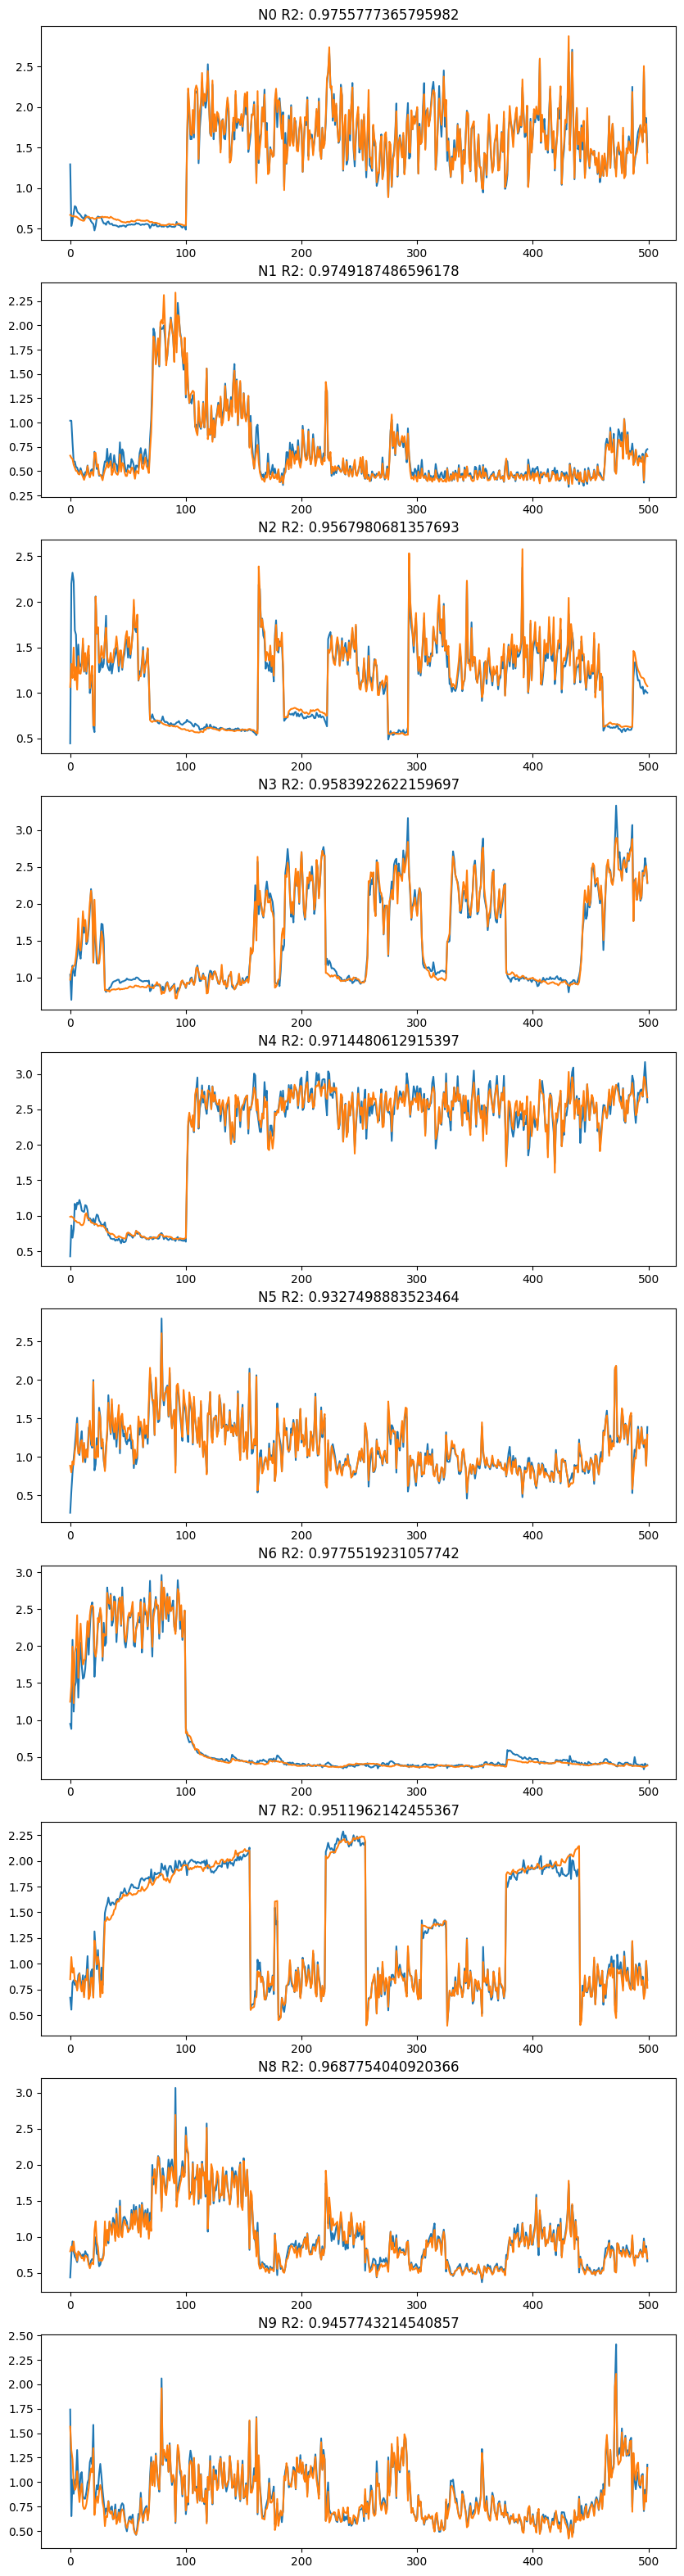

In [ ]:
# sims = comparison.compare_dynamics_DSA()

import torch
phase= "val"

rates, latents = comparison.analyses[1].get_model_outputs(phase=phase)
true_rates = comparison.analyses[1].get_true_rates(phase=phase)

from sklearn.metrics import r2_score
tr_np = true_rates.detach().cpu().numpy()
rates_np = rates.detach().cpu().numpy()
tr_np = tr_np.reshape(-1, tr_np.shape[-1])
rates_np = rates_np.reshape(-1, rates_np.shape[-1])
print(tr_np.shape)
print(rates_np.shape)
r2 = r2_score(tr_np, rates_np, multioutput='raw_values')
print(r2)

trial_num= 1
rates_0 = rates[trial_num,:,:].detach().numpy()
latents_0 = latents[trial_num,:,:].detach().numpy()
true_rate_0 = true_rates[trial_num,:,:].detach().numpy()

neurons_to_plot= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig = plt.figure(figsize=( 10,4*len(neurons_to_plot),))
axes = fig.subplots(len(neurons_to_plot))
for i, ax in enumerate(axes):
    ax.plot(rates_0[:, neurons_to_plot[i]], label="Reconstructed")
    ax.plot(true_rate_0[:, neurons_to_plot[i]], label="True")
    ax.set_title(f"N{neurons_to_plot[i]} R2: {r2[neurons_to_plot[i]]}")

In [ ]:
# Take upper triangle of sims
# sims = np.triu(sims, k=0)
# sims = sims.flatten()
# self_sim = sims[0]
# sims = sims[1:]
# fig = plt.figure()
# plt.bar(range(len(sims)), sims)
# plt.title("Dynamical Similarity")
# plt.xlabel("Model")
# plt.ylabel("Similarity")
# plt.xticks(range(len(sims)), ["GRU", "Vanilla", "NODE"])    

comparison.compare_to_reference_affine